Looking into why the tab emu seems biased at small scales, if it makes sense or not. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import h5py

In [3]:
from pearce.mocks.kittens import TrainingBox

In [4]:
from pearce.mocks.customHODModels import *

In [5]:
from halotools.mock_observables import wp

In [6]:
tab_wp = np.load('/u/ki/swmclau2/Git/pearce/bin/mock_measurements/TAB_HODmock_wp.npy')

In [7]:
tab_hod_catalog = np.load(\
                '/u/ki/swmclau2/des/aemulus_mock_catalogs/hod_catalog_tmp.npy',
                         allow_pickle=True)

In [8]:
tab_hod_catalog.shape

(707465,)

In [9]:
np.sum(tab_hod_catalog['gal_type']=='satellites')*1.0/tab_hod_catalog.shape[0]

0.09907345239693836

In [10]:
gal_pos = np.vstack(tab_hod_catalog[c] for c in ['x','y','z']).T

/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


In [11]:
r_bins = np.logspace(-1, 1.6, 19)
rbc = (r_bins[1:]+r_bins[:-1])/2.0

In [12]:
tab_wp2 = wp(gal_pos, r_bins, 40, period=1000.0)

In [13]:
tab_wp2==tab_wp

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [14]:
cat = TrainingBox(20) #0

In [15]:
haloprop_bins = np.logspace(10,16, 60)#120)
mass_bin_centers = (haloprop_bins[1:]+haloprop_bins[:-1])/2.0

In [16]:
cen_hod = np.load('/u/ki/swmclau2/des/aemulus_mock_catalogs/sham_cen_hod2.npy')
sat_hod = np.load('/u/ki/swmclau2/des/aemulus_mock_catalogs/sham_sat_hod2.npy')

In [17]:
cat.load(1.0, HOD='zheng07')
hod_params = {'alpha': 1.083, 'logM0': 13.2, 'logM1': 14.2, 'sigma_logM': 0.6}
hod_params['logMmin'] = 13.093#13668041816722 # did the fit separately#13.0 


In [18]:
cat.populate(hod_params, min_ptcl=0)

In [19]:
aem_wp_cat = cat.calc_wp(r_bins)

In [20]:
aem_pos = np.vstack(cat.model.mock.galaxy_table[c] for c in ['x','y','z']).T
aem_wp_manual = wp(aem_pos, r_bins, period=cat.Lbox, pi_max=40)

/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


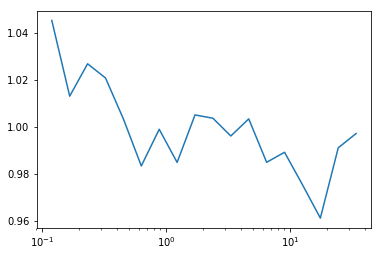

In [21]:
plt.plot(rbc, aem_wp_cat/tab_wp2)
#plt.plot(rbc, tab_wp2/tab_wp)

plt.xscale('log')

In [22]:
aem_catalog = cat.model.mock.galaxy_table.as_array()

In [23]:
aem_catalog.shape, tab_hod_catalog.shape

((852158,), (707465,))

In [24]:
np.sum(aem_catalog['gal_type'] == 'satellites')*1.0/aem_catalog.shape

array([0.1055133])

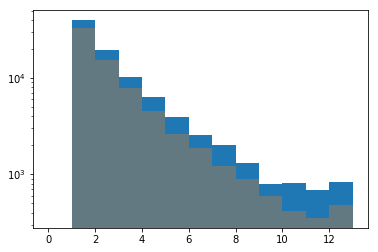

In [25]:
bins = np.array(range(14))
plt.hist(aem_catalog['halo_num_satellites'][aem_catalog['gal_type'] == 'satellites'],
        bins = bins)
plt.hist(tab_hod_catalog['halo_num_satellites']\
         [tab_hod_catalog['gal_type']=='satellites'],
        bins = bins, alpha = 0.3);
plt.yscale('log')

In [26]:
aem_hist = np.histogram(aem_catalog['halo_num_satellites']\
                        [aem_catalog['gal_type'] == 'satellites'],
        bins = bins)[0]

tab_hist = np.histogram(tab_hod_catalog['halo_num_satellites']\
         [tab_hod_catalog['gal_type']=='satellites'],
        bins = bins)[0]

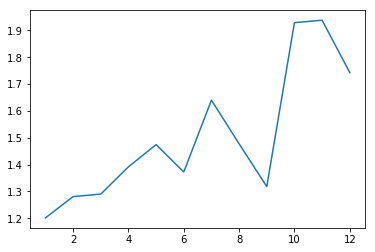

In [27]:
plt.plot(aem_hist*1.0/tab_hist)

In [28]:
print aem_hist*1.0/tab_hist

[       nan 1.20153609 1.28090034 1.29018709 1.39168877 1.47448015
 1.37261146 1.64       1.47747748 1.31818182 1.92857143 1.9375
 1.74261603]


In [29]:
aem_hist

array([    0, 39736, 19690, 10137,  6296,  3900,  2586,  2009,  1312,
         783,   810,   682,   826])

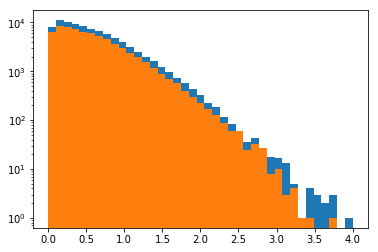

In [30]:
bins = np.linspace(0, 4, 40)
plt.hist(aem_catalog['host_centric_distance'][aem_catalog['gal_type'] == 'satellites'], 
         bins = bins)
plt.hist(tab_hod_catalog['host_centric_distance'][tab_hod_catalog['gal_type'] == 'satellites'], 
         bins = bins)
plt.yscale('log')

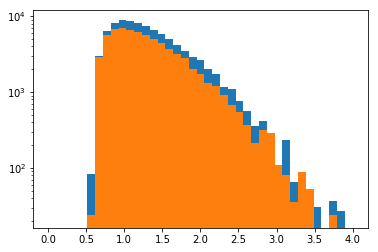

In [31]:
bins = np.linspace(0, 4, 40)
plt.hist(aem_catalog['halo_rvir'][aem_catalog['gal_type'] == 'satellites'],
        bins = bins)
plt.hist(tab_hod_catalog['halo_rvir'][tab_hod_catalog['gal_type'] == 'satellites'], 
         bins = bins)
plt.yscale('log')

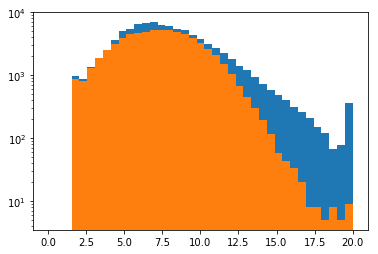

In [32]:
bins = np.linspace(0, 20, 40)
plt.hist(aem_catalog['conc_NFWmodel'][aem_catalog['gal_type'] == 'satellites'],
        bins = bins)
plt.hist(tab_hod_catalog['conc_NFWmodel'][tab_hod_catalog['gal_type'] == 'satellites'], 
         bins = bins)
plt.yscale('log')

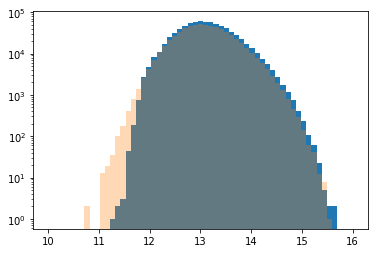

In [33]:
bins = np.linspace(10, 16, 60)
plt.hist(np.log10(aem_catalog['halo_mvir'][aem_catalog['gal_type'] != 'satellites']),
        bins = bins)
plt.hist(np.log10(tab_hod_catalog['halo_mvir']\
                  [tab_hod_catalog['gal_type'] != 'satellites']), 
         bins = bins, alpha = 0.3)
plt.yscale('log')

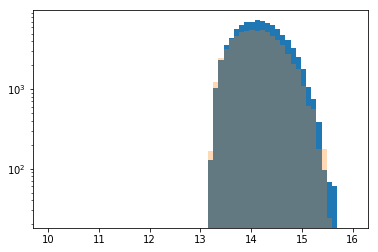

In [34]:
bins = np.linspace(10, 16, 60)
plt.hist(np.log10(aem_catalog['halo_mvir'][aem_catalog['gal_type'] == 'satellites']),
        bins = bins)
plt.hist(np.log10(tab_hod_catalog['halo_mvir']\
                  [tab_hod_catalog['gal_type'] == 'satellites']), 
         bins = bins, alpha = 0.3)
plt.yscale('log')

In [35]:
aem_catalog.dtype

dtype([('halo_upid', '<i8'), ('halo_hostid', '<i8'), ('conc_NFWmodel', '<f4'), ('halo_y', '<f4'), ('halo_x', '<f4'), ('halo_z', '<f4'), ('halo_vx', '<f4'), ('halo_vy', '<f4'), ('halo_vz', '<f4'), ('halo_rvir', '<f4'), ('halo_mvir', '<f4'), ('halo_id', '<i8'), ('halo_num_centrals', '<i4'), ('halo_num_satellites', '<i4'), ('gal_type', 'O'), ('vx', '<f4'), ('host_centric_distance', '<f8'), ('vy', '<f4'), ('y', '<f4'), ('x', '<f4'), ('vz', '<f4'), ('z', '<f4')])

In [36]:
from halotools.mock_observables import tpcf_one_two_halo_decomp, tpcf

In [37]:
tab_hod_catalog.dtype

dtype([('halo_upid', '<i8'), ('halo_hostid', '<i8'), ('conc_NFWmodel', '<f4'), ('halo_y', '<f4'), ('halo_x', '<f4'), ('halo_z', '<f4'), ('halo_vx', '<f4'), ('halo_vy', '<f4'), ('halo_vz', '<f4'), ('halo_rvir', '<f4'), ('halo_mvir', '<f4'), ('halo_id', '<i8'), ('halo_num_centrals', '<i4'), ('halo_num_satellites', '<i4'), ('gal_type', 'O'), ('vx', '<f4'), ('host_centric_distance', '<f8'), ('vy', '<f4'), ('y', '<f4'), ('x', '<f4'), ('vz', '<f4'), ('z', '<f4')])

In [38]:
tab_xi = tpcf(gal_pos, r_bins, period=1000.0)

In [39]:
aem_pos = np.vstack(aem_catalog[c] for c in ['x','y','z']).T

/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


In [40]:
aem_xi = tpcf(aem_pos, r_bins, period=cat.Lbox)

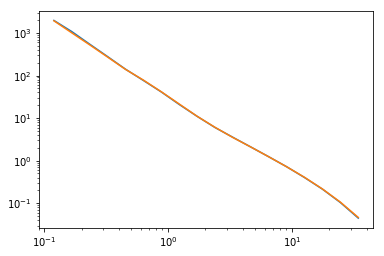

In [41]:
plt.plot(rbc, aem_xi)
plt.plot(rbc, tab_xi)
plt.loglog();

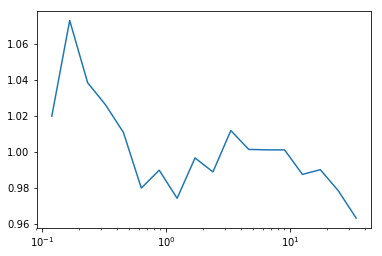

In [42]:
fig = plt.figure(facecolor = 'w')
plt.plot(rbc, aem_xi/tab_xi)

plt.xscale('log')

In [43]:
tab_xi_1h, tab_xi_2h = tpcf_one_two_halo_decomp(gal_pos, tab_hod_catalog['halo_hostid'],\
                                                r_bins, period=1000.0)

In [44]:
aem_xi_1h, aem_xi_2h = tpcf_one_two_halo_decomp(aem_pos, aem_catalog['halo_hostid'],\
                                                r_bins, period=cat.Lbox)

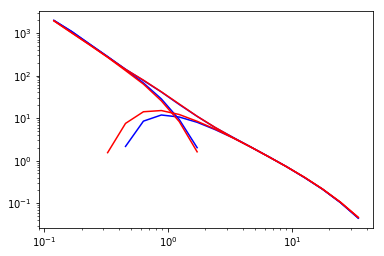

In [45]:
plt.plot(rbc, aem_xi_2h, color = 'b')
plt.plot(rbc, aem_xi_1h, color ='b')
plt.plot(rbc, aem_xi, color = 'b')
plt.plot(rbc, tab_xi_2h, color = 'r')
plt.plot(rbc, tab_xi_1h, color = 'r')
plt.plot(rbc, tab_xi, color = 'r')

plt.loglog();

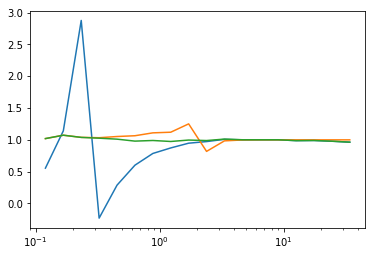

In [46]:
plt.plot(rbc, aem_xi_2h/tab_xi_2h)
plt.plot(rbc, aem_xi_1h/tab_xi_1h)
plt.plot(rbc, aem_xi/tab_xi)
plt.xscale('log');

In [47]:
tab_cut = tab_hod_catalog['halo_mvir']>10**13
aem_cut = aem_catalog['halo_mvir']>10**13

In [48]:
tab_h_xi = tpcf(gal_pos, r_bins, period=1000.0)#, pi_max=40)
aem_h_xi = tpcf(aem_pos, r_bins, period=cat.Lbox)#, pi_max=40)

In [49]:
tab_l_xi = tpcf(gal_pos[~tab_cut],\
                  r_bins, period=1000.0)#, pi_max=40)
aem_l_xi = tpcf(aem_pos[~aem_cut],\
                  r_bins, period=cat.Lbox)#, pi_max=40)

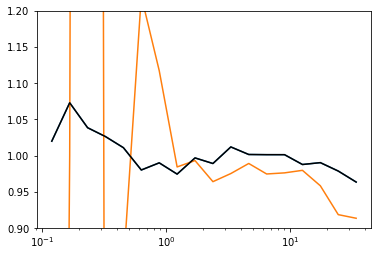

In [50]:
plt.plot(rbc,  aem_h_xi/tab_h_xi)
plt.plot(rbc, aem_l_xi/tab_l_xi)
plt.plot(rbc, aem_xi/tab_xi, color = 'k')
plt.ylim([0.9, 1.2])
plt.xscale('log')

In [51]:
tab_cen_xi = wp(gal_pos[tab_hod_catalog['gal_type'] != 'satellites'],\
                  r_bins, period=1000.0, pi_max=40)
aem_cen_xi = wp(aem_pos[aem_catalog['gal_type'] != 'satellites'],\
                  r_bins, period=cat.Lbox, pi_max=40)

In [52]:
tab_sat_xi = wp(gal_pos[tab_hod_catalog['gal_type'] == 'satellites'],\
                  r_bins, period=1000.0, pi_max=40)
aem_sat_xi = wp(aem_pos[aem_catalog['gal_type'] == 'satellites'],\
                  r_bins, period=cat.Lbox, pi_max=40)

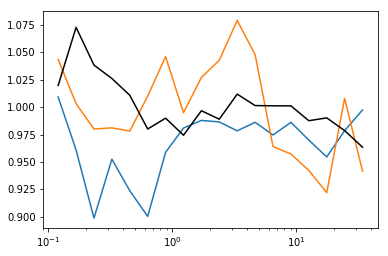

In [53]:
plt.plot(rbc,  aem_cen_xi/tab_cen_xi)
plt.plot(rbc, aem_sat_xi/tab_sat_xi)
plt.plot(rbc, aem_xi/tab_xi, color = 'k')
#plt.ylim([0.9, 1.2])
plt.xscale('log')

NameError: name 'tab_wp3' is not defined

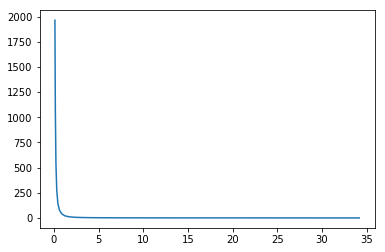

In [54]:
plt.plot(rbc, aem_h_xi)
plt.plot(rbc, tab_wp3)
plt.loglog();